In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2154,ham,Oh god i am happy to see your message after 3 ...,NaN,NaN,NaN
4832,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ...",NaN,NaN,NaN
3039,ham,One day a crab was running on the sea shore..T...,NaN,NaN,NaN
3406,ham,Beautiful Truth against Gravity.. Read careful...,NaN,NaN,NaN
5198,ham,She.s fine. I have had difficulties with her p...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning
# 2. EDA
# 3. Test PreProcessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website Building
# 8. Deploy

**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Drop last 3 column because unnecessary Data
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
3364,ham,"Sorry, I'll call later"
1711,ham,I got your back! Do you have any dislikes in bed?
5085,ham,Sorry i missed your call. Can you please call ...
4341,ham,Ha! I wouldn't say that I just didn't read any...
1971,ham,Enjoy ur life. . Good night


In [ ]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,target,text
2784,ham,"K, wat s tht incident?"
5000,ham,"Nope. Since ayo travelled, he has forgotten hi..."
755,ham,So why didnt you holla?
4466,ham,"She said,'' do u mind if I go into the bedroom..."
3370,ham,Tomorrow i am not going to theatre. . . So i c...


In [ ]:
#ham and spam value is not defined then we use 0-Ham and 1-Spam
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['target'] = encoder.fit_transform(df['target'])


In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
#Checking missing values like 'Null' values
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
#checking for duplicate values
df.duplicated().sum()

403

In [33]:
#Remove duplicate values
df = df.drop_duplicates(keep='first')

In [34]:
df.duplicated().sum()

0

**EDA**

In [35]:
#check how many text are ham and spam
#here ham is 4516 and spam is 653
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

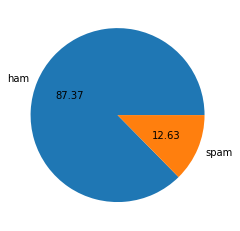

In [38]:
#you can also represent this data using graphs, you have to use matplotlib library
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()
#here you can see data is imbalanced

In [39]:
#here we can check how many words,alphabets and sentences in the SMS for this we use "nltk" library
import nltk

In [41]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
#counting number of words
df['num_characters'] = df['text'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [47]:
#fetching number of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
